<a href="https://colab.research.google.com/github/ciertou/pytorch-deep-learning-ztm/blob/main/feature_engineering_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls -l sample_data/california_housing_train.csv

-rw-r--r-- 1 root root 1706430 Aug 20 13:23 sample_data/california_housing_train.csv


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("sample_data/california_housing_train.csv")
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

<ipython-input-4-8d040152a4ca>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,median_income,latitude,longitude
0,1.4936,34.19,-114.31
1,1.8200,34.40,-114.47
2,1.6509,33.69,-114.56
3,3.1917,33.64,-114.57
4,1.9250,33.57,-114.57


In [7]:
X = df.copy()
y = X.pop("median_house_value")


# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = [
    "median_income", "latitude", "longitude"
]


# Standardize
X_scaled = df.loc[:, ["median_income", "latitude", "longitude"]]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)



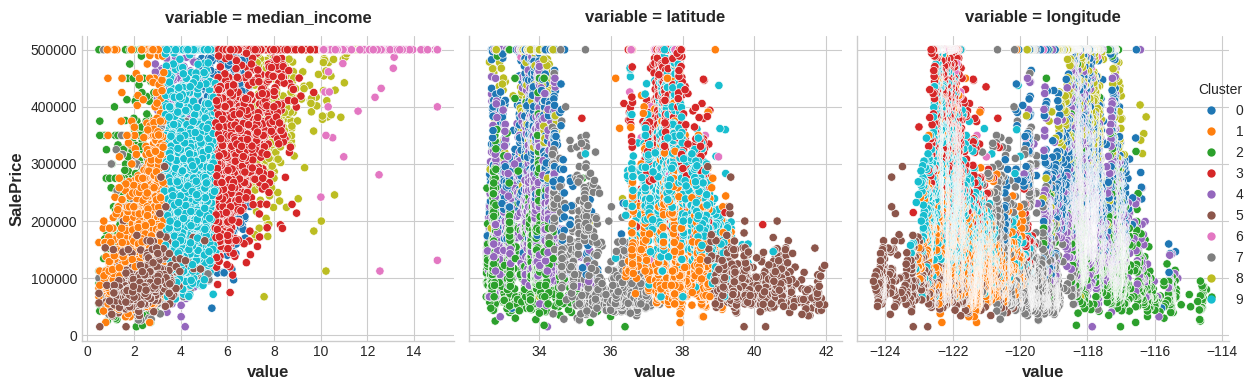

In [10]:
features = [
    "median_income", "latitude", "longitude"
]

Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);